# Problem Statement:
The NYC Taxi Company wants to predict the duration of each trip at the point when the trip starts


# Hypothesis Generation
Variables which might influence the duration of trips
1.	Weather
2.	Day - Monday, Weekend
3.	Time - Morning, Noon, Evening, Night
4.	City-type - location
5.	Traffic
6.	demographics of drivers - age, gender, married status, family size
7.	Mood of driver - talk with customers
8.	Music play -ON/OFF
9.	Number of customers
10.	Distance to be covered
11.	Speed, Mileage of car
12.	Road conditions
13.	Salary scale
14.	Incentives
15.	Target set


# Data Extraction and collection
Data Sources
1.	Trip Info
2.	Traffic & Geographic info
3.	Weather

Trip Info - id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count
Traffic & Geographic info - pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
Weather - store_and_fwd_flag


Target variable is the trip_duration (Given)

We know Time = Distance/ speed. 
So trip_duration is a function of distance and the average speed of the taxi.

Distance remains constant wrt start and end point, so trip_duration is affected by Avg Speed of Taxi.

**Speed factors can be:**

*	Traffic
*	Weather
*	Road conditions
*	Day of week
*	Month of year
*	Time - Morning, Noon, Evening, Night
*	Demographics of drivers - age, gender, married status, family size
*	Mood of driver - talk with customers
*	Music play -ON/OFF
*	Number of passengers
*	Distance to be covered
*	Condition & Mileage of car
*	Salary scale
*	Incentives



***Available features:***
1.	id
2.	vendor_id
3.	pickup_datetime
4.	dropoff_datetime
5.	passenger_count
6.	pickup_longitude
7.	pickup_latitude
8.	dropoff_longitude
9.	dropoff_latitude
10.	store_and_fwd_flag
11.	trip_duration


**Additional Features needed:**
*    Distance from Pickup and Drop-off coordinates
*    Average speed = Distance/ trip_duration

**Feature extraction needed:**
*	Dayofweek
*	Month
*	Hour
*	Timezones


**Available features that might have correlation with the Duration of a trip.**
*	vendor_id
*	Day of week
*	Month of year
*	Timezone - Morning, Noon, Evening, Night
*	passenger_count
*	Distance
*	store_and_fwd_flag

**Available features that might have correlation with the Speed of a trip.**

*	vendor_id
*	Day of week
*	Month of year
*	Timezone - Morning, Noon, Evening, Night
*	passenger_count
*	Distance
*	store_and_fwd_flag


## Reading Dataset into Python

In [1]:
import os
os.chdir(r"D:\Datascience\Analytics vidya\LabAV\NYC Taxi Trip Duration Prediction")
os.listdir()

['nyc_taxi_final-1560498097450.zip', 'nyc_taxi_trip_duration.csv']

In [2]:
import pandas as pd #importing lib
import numpy as np
import seaborn as sns
sns.set(style= "darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("nyc_taxi_trip_duration.csv") #importing data

In [4]:
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429


In [5]:
data.tail(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729312,id3683137,2,2016-01-01 00:47:30,2016-01-01 01:12:56,1,-73.984779,40.779781,-73.998718,40.739777,N,1526
729313,id3993907,1,2016-02-05 11:24:34,2016-02-05 11:46:39,1,-73.994034,40.751015,-74.003738,40.722240,N,1325
729314,id3226129,2,2016-03-21 03:43:03,2016-03-21 04:05:21,2,-73.987740,40.748222,-73.949585,40.680737,N,1338
729315,id3234032,1,2016-06-28 06:41:53,2016-06-28 06:43:43,1,-73.984116,40.725372,-73.982544,40.731377,N,110
729316,id2031090,2,2016-01-25 22:31:56,2016-01-25 22:39:25,1,-73.974487,40.783138,-73.952629,40.772270,N,449
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [6]:
#shape
data.shape

(729322, 11)

In [7]:
#columns
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [8]:
#number of missing values
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
#check for unique values
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

**Calculating Distance from Pickup and Drop-off coordinates**

In [10]:
# function for calculation of distance from Latitudes and Longitudes
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2-lat1)
   delta_lambda = np.radians(lon2-lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)))
   return np.round(res, 2)

In [11]:
data['distance'] = data.apply(lambda x: haversine_distance(x['pickup_latitude'], x['pickup_longitude'], x["dropoff_latitude"], x["dropoff_longitude"]), axis=1)

**Calculating Average speed as [Distance/ trip_duration]**

In [12]:
# The speed is calculated in km/h
data["speed"] = data["distance"] / (data["trip_duration"] / 3600)

In [13]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.20,10.800000
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.13,13.516364
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.25,15.963303
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.36,7.446100
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.33,18.382075


### Data Variable identification, typecasting

In [14]:
#datatypes
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
distance              float64
speed                 float64
dtype: object

In [15]:
#closer look at int64
data.dtypes[data.dtypes =='int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [16]:
#There are only 2 vendors, so converting them into Nominal categories
data["vendor_id"]= data["vendor_id"].astype('category')

In [17]:
#closer look at float64
data.dtypes[data.dtypes == "float64"]

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
distance             float64
speed                float64
dtype: object

In [18]:
#closer look at object
data.dtypes[data.dtypes == "object"]

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [19]:
#There are only 2 values for store_and_fwd_flag , so converting them into Nominal categories
data["store_and_fwd_flag"]= data["store_and_fwd_flag"].astype('category')

***DateTime Typecasting***
* we have to convert it to datetime object to create new features

In [20]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])
data["dropoff_datetime"] = pd.to_datetime(data["dropoff_datetime"])

**Feature extraction needed:**
*	Dayofweek
*	Month
*	Hour
*	Timezones


In [21]:
#Dayname
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

##Daynumberweek
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

#Monthname
data['pickup_month']=data['pickup_datetime'].dt.month_name()
data['dropoff_month']=data['dropoff_datetime'].dt.month_name()

#Hour
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour

**we have to categorise Timezone as**

* ***Morning*** 4-10hr
* ***Noon***  10-16hr
* ***Evening*** 16-22hr
* ***Night*** 22-4hr

In [22]:
def timezone(x):
    if x in range(4,10):
        return "Morning"
    elif x in range(10,16):
        return "Noon"
    elif x in range(16,22):
        return "Evening"
    else:
        return "Night"

In [23]:
data["pickup_timezone"]= data["pickup_hour"].apply(timezone)
data["dropoff_timezone"]= data["dropoff_hour"].apply(timezone)

In [24]:
data.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
distance                     float64
speed                        float64
pickup_day                    object
dropoff_day                   object
pickup_day_no                  int64
dropoff_day_no                 int64
pickup_month                  object
dropoff_month                 object
pickup_hour                    int64
dropoff_hour                   int64
pickup_timezone               object
dropoff_timezone              object
dtype: object

In [25]:
#closer look at object again
data.dtypes[data.dtypes == "object"]

id                  object
pickup_day          object
dropoff_day         object
pickup_month        object
dropoff_month       object
pickup_timezone     object
dropoff_timezone    object
dtype: object

In [26]:
#Days, Months & timezone are converted into Nominal categories
data["pickup_day"]= data["pickup_day"].astype('category')
data["dropoff_day"]= data["dropoff_day"].astype('category')

data["pickup_month"]= data["pickup_month"].astype('category')
data["dropoff_month"]= data["dropoff_month"].astype('category')

data["pickup_timezone"]= data["pickup_timezone"].astype('category')
data["dropoff_timezone"]= data["dropoff_timezone"].astype('category')
data.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
distance                     float64
speed                        float64
pickup_day                  category
dropoff_day                 category
pickup_day_no                  int64
dropoff_day_no                 int64
pickup_month                category
dropoff_month               category
pickup_hour                    int64
dropoff_hour                   int64
pickup_timezone             category
dropoff_timezone            category
dtype: object

In [27]:
data.describe() #initial feel about numeric data

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,speed,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000
mean,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,3.441144,14.420681,3.049081,3.053015,13.611698,13.60616
std,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,4.353141,12.339720,1.954470,1.956866,6.402853,6.48637
min,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,1.230000,9.124138,1.000000,1.000000,9.000000,9.00000
50%,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,2.100000,12.797015,3.000000,3.000000,14.000000,14.00000
75%,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,3.880000,17.843915,5.000000,5.000000,19.000000,19.00000
max,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,1240.910000,5640.500000,6.000000,6.000000,23.000000,23.00000


* Passenger count minimum 0 is more likely to be error
* Passenger count Maximum 9 needs more exploration

* minimum trip duration and Max duration needs more exploration

* Distance 1240.910000 likely to be an error
* Speed 5640.500000 likely to be an error

## Univariate Analysis


### 1. Numerical Values

In [28]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

In [29]:
data.select_dtypes(include= ["int64", "float64"]).dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
distance             float64
speed                float64
pickup_day_no          int64
dropoff_day_no         int64
pickup_hour            int64
dropoff_hour           int64
dtype: object

*Grouping based on needed Numerical variables*

In [30]:
target= ['trip_duration']

pcount= ["passenger_count"]
tripdatetime= ["pickup_day_no","dropoff_day_no","pickup_hour", "dropoff_hour"]
distspeed= ["distance", "speed"]

**1. Target Variable - trip_duration**

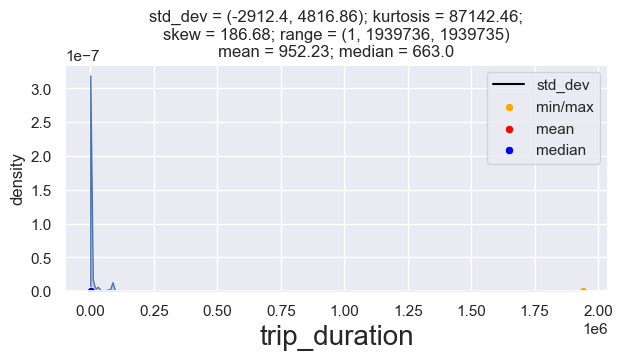

In [31]:
UVA_numeric(data,target)

In [32]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
312992          1
398887          1
622664          1
323299          1
296874          1
Name: trip_duration, Length: 729322, dtype: int64

* The maximum value(Extreme outlier) is 1.9 milion seconds ie 22.45064815 days.
* Trip duration of 22.45064815 exists only once and we can safely remove this row as its an error.

* The minimum value is 1 second which is most probably error

**2. Passenger Count**

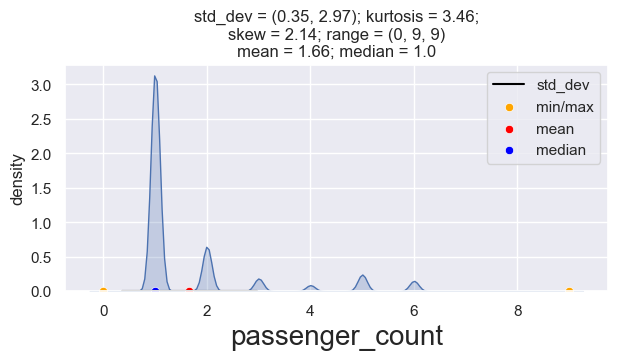

In [33]:
UVA_numeric(data,pcount)

In [34]:
data["passenger_count"].value_counts() #freq distribution

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

**Summary of Passenger count:**
 *      There are 33 zero passengers which might be error
 *      Most passengers lies between 1 & 2
 *      Passengers above 6 is rare  
 * Passenger count Maximum 9 needs more exploration



**3.Tripdatetime**


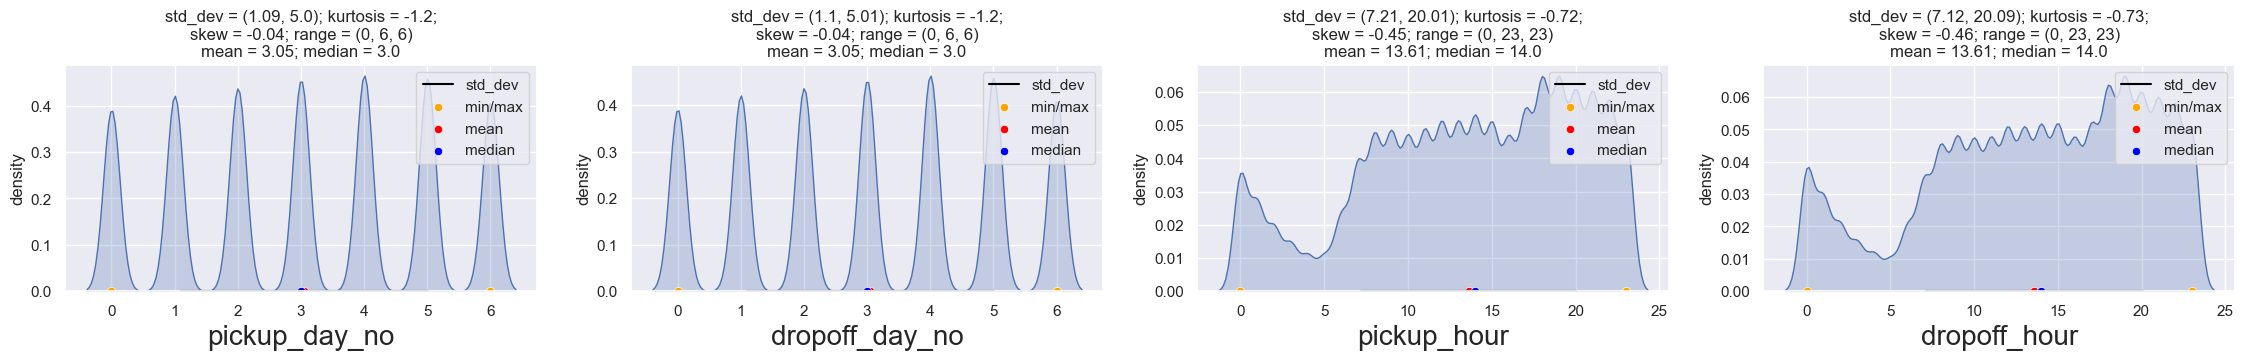

In [35]:
UVA_numeric(data,tripdatetime)

In [36]:
tripdatetime

['pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour']

In [37]:
data["pickup_day_no"].value_counts() #freq distribution

4    111744
5    110252
3    109344
2    105074
1    101254
6     97682
0     93972
Name: pickup_day_no, dtype: int64

**Summary of day of week :**
*      Most passengers is on friday and saturday
*      monday has least passengers followed by sunday

**3.Distspeed**


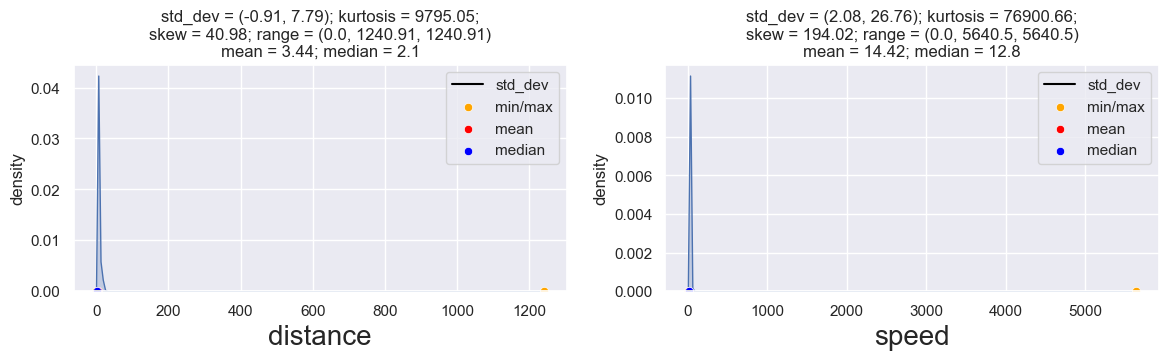

In [38]:
UVA_numeric(data,distspeed)

In [39]:
data['distance'].sort_values(ascending=False)

244913    1240.91
621372     574.88
441429     545.85
654569     320.13
697620     314.76
           ...   
207113       0.00
542851       0.00
410328       0.00
35510        0.00
664869       0.00
Name: distance, Length: 729322, dtype: float64

In [40]:
data["distance"].value_counts() #freq distribution

0.00     3927
1.22     2637
1.17     2619
1.18     2619
1.11     2605
         ... 
31.41       1
24.77       1
26.25       1
26.62       1
25.98       1
Name: distance, Length: 3006, dtype: int64

**Summary of distance:**
* Distance 1240.910000 likely to be an error, have to be removed.
* 3927 trips with zero distance, which is an error

In [41]:
data['speed'].sort_values(ascending=False)

244913    5640.500000
654569    4086.765957
67268     1408.235294
146590    1404.000000
267279    1351.741935
             ...     
370716       0.000000
370711       0.000000
573584       0.000000
539202       0.000000
494159       0.000000
Name: speed, Length: 729322, dtype: float64

In [42]:
data["speed"].value_counts() #freq distribution

0.000000     3927
12.000000     933
18.000000     866
9.000000      649
14.400000     369
             ... 
7.686076        1
14.166791       1
15.771845       1
10.120577       1
15.779439       1
Name: speed, Length: 300157, dtype: int64

**Summary of Speed:**
* Speed 5640.500000 likely to be an error
* There are 3927 Zero speed entries

### 2. Categorical Values

In [43]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [44]:
data.select_dtypes(include= "category").dtypes

vendor_id             category
store_and_fwd_flag    category
pickup_day            category
dropoff_day           category
pickup_month          category
dropoff_month         category
pickup_timezone       category
dropoff_timezone      category
dtype: object

*Grouping based on needed categorical variables*

In [45]:
vendor= ["vendor_id"]
climate= ["store_and_fwd_flag"]
tripdatetimeC= ["pickup_day","dropoff_day","pickup_month","dropoff_month","pickup_timezone","dropoff_timezone"]


**1. Vendor**

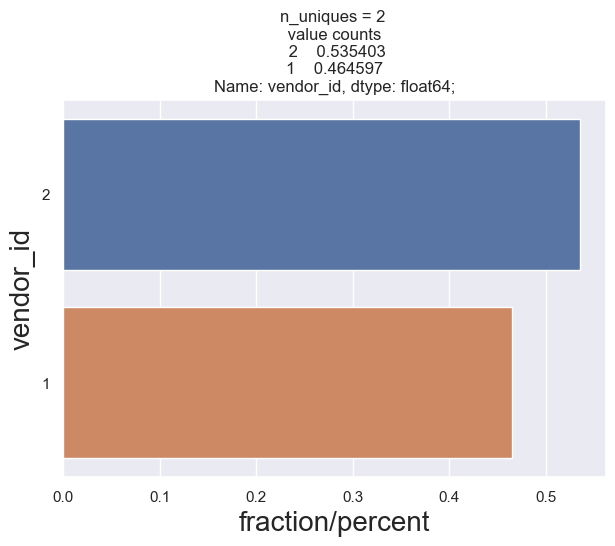

In [46]:
UVA_category(data, vendor)

In [47]:
data["vendor_id"].value_counts(normalize= True)*100

2    53.540274
1    46.459726
Name: vendor_id, dtype: float64

**Summary of Vendor:**
* vendor 2 has more trips


**2. Climate**


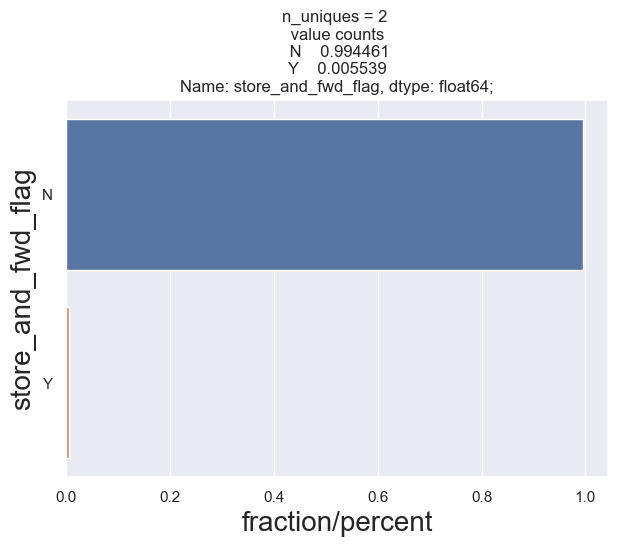

In [48]:
UVA_category(data, climate)

In [49]:
data["store_and_fwd_flag"].value_counts(normalize= True)*100

N    99.446061
Y     0.553939
Name: store_and_fwd_flag, dtype: float64

**Summary of Climate:**
* Climate variable, store_and_fwd_flag is mostly non operational


**3.Tripdatetime Categorical**


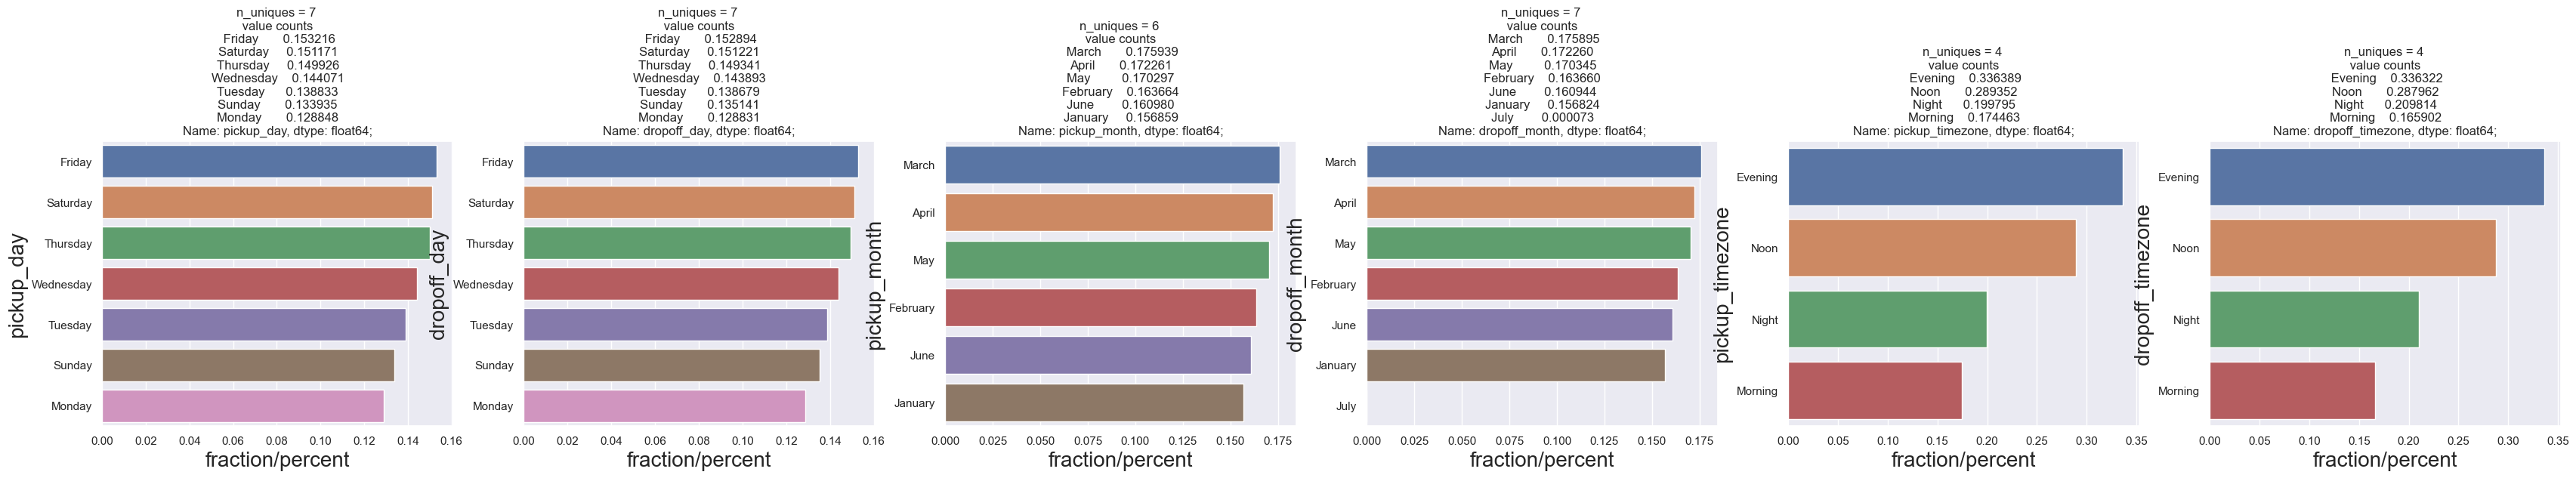

In [50]:
UVA_category(data, tripdatetimeC)

In [51]:
data["pickup_day"].value_counts(normalize= True)*100 #freq distribution

Friday       15.321627
Saturday     15.117054
Thursday     14.992555
Wednesday    14.407079
Tuesday      13.883305
Sunday       13.393535
Monday       12.884844
Name: pickup_day, dtype: float64

In [52]:
data["pickup_month"].value_counts(normalize= True)*100 #freq distribution

March       17.593875
April       17.226136
May         17.029652
February    16.366433
June        16.097965
January     15.685938
Name: pickup_month, dtype: float64

In [53]:
data["pickup_timezone"].value_counts(normalize= True)*100 #freq distribution

Evening    33.638914
Noon       28.935230
Night      19.979515
Morning    17.446341
Name: pickup_timezone, dtype: float64

**Summary: Tripdatetime Categorical**

*	Most passengers is on Friday and Saturday
*	Monday has least passengers followed by Sunday

* Evening & Noon Timezone has more trips, Morning the least
* There is not much difference in the number of trips across months.


## Summary – UVA

**Summary of Target variable:**
*	The maximum value (Extreme outlier) is 1.9 million seconds ie 22.45064815 days.
*	Trip duration of 22.45064815 exists only once and we can safely remove this row as it’s an error.
*	The minimum value is 1 second which is most probably error

**Summary of Passenger count:**
*	There are 33 zero passengers which might be error
*	Most passengers lies between 1 & 2
*	Passengers above 6 is rare
*	Passenger count Maximum 9 needs more exploration

**Summary of day of week:**
*	Most passengers is on Friday and Saturday
*	Monday has least passengers followed by Sunday

**Summary of distance:**
*	Distance 1240.910000 likely to be an error, have to be removed.
*	3927 trips with zero distance, which is an error

**Summary of Speed:**
*	Speed 5640.500000 likely to be an error
*	There are 3927 Zero speed entries

**Summary of Vendor:**
*	vendor 2 has more trips

**Summary of Climate:**
*	Climate variable, store_and_fwd_flag is mostly non operational

**Summary of Time Zone & Month:**

*	Evening & Noon Timezone has more trips, Morning the least
*	There is not much difference in the number of trips across months.


***we have idenitified outliers on***
1. trip_duration
2. distance                     
3. speed  
4. passenger_count                

### Investigation directions from Univariate Analysis
1. Drop id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude variables
2. Investigate into passenger count minimum 0 (33 passengers ) & 9
3. Investigate into Minimum trip duration 0 also needs more exploration into its outlier
4. Investigate into 3927 trips with zero distance, explore for reasons
5. Remove Extreme Outliers and Impossible values like min=0


# Bi- Variate Analysis


### BVA- Continuous - Continuous variables

In [54]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64'])[:]
numerical.dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
distance             float64
speed                float64
pickup_day_no          int64
dropoff_day_no         int64
pickup_hour            int64
dropoff_hour           int64
dtype: object

### Correlation Matrix

In [55]:
# calculating correlation
correlation = numerical.corr()
correlation

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,speed,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,0.009175,-0.002628,0.025758,0.025941,0.009851,0.009214
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.251483,0.095259,-0.016031,-0.016846,0.010754,0.011170
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.128454,0.116855,-0.029073,-0.029254,0.011433,0.018061
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,0.132354,0.045934,-0.001473,-0.001396,-0.022014,-0.023193
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.153759,-0.054251,-0.022028,-0.022396,0.014257,0.018173
trip_duration,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.125772,-0.028176,-0.002302,-0.003369,0.002979,0.003027
distance,0.009175,0.251483,-0.128454,0.132354,-0.153759,0.125772,1.000000,0.575187,0.007787,0.008227,-0.016270,-0.020936
speed,-0.002628,0.095259,0.116855,0.045934,-0.054251,-0.028176,0.575187,1.000000,0.044316,0.043588,-0.064606,-0.072875
pickup_day_no,0.025758,-0.016031,-0.029073,-0.001473,-0.022028,-0.002302,0.007787,0.044316,1.000000,0.993789,-0.082079,-0.085767
dropoff_day_no,0.025941,-0.016846,-0.029254,-0.001396,-0.022396,-0.003369,0.008227,0.043588,0.993789,1.000000,-0.078777,-0.089876


### Heatmap

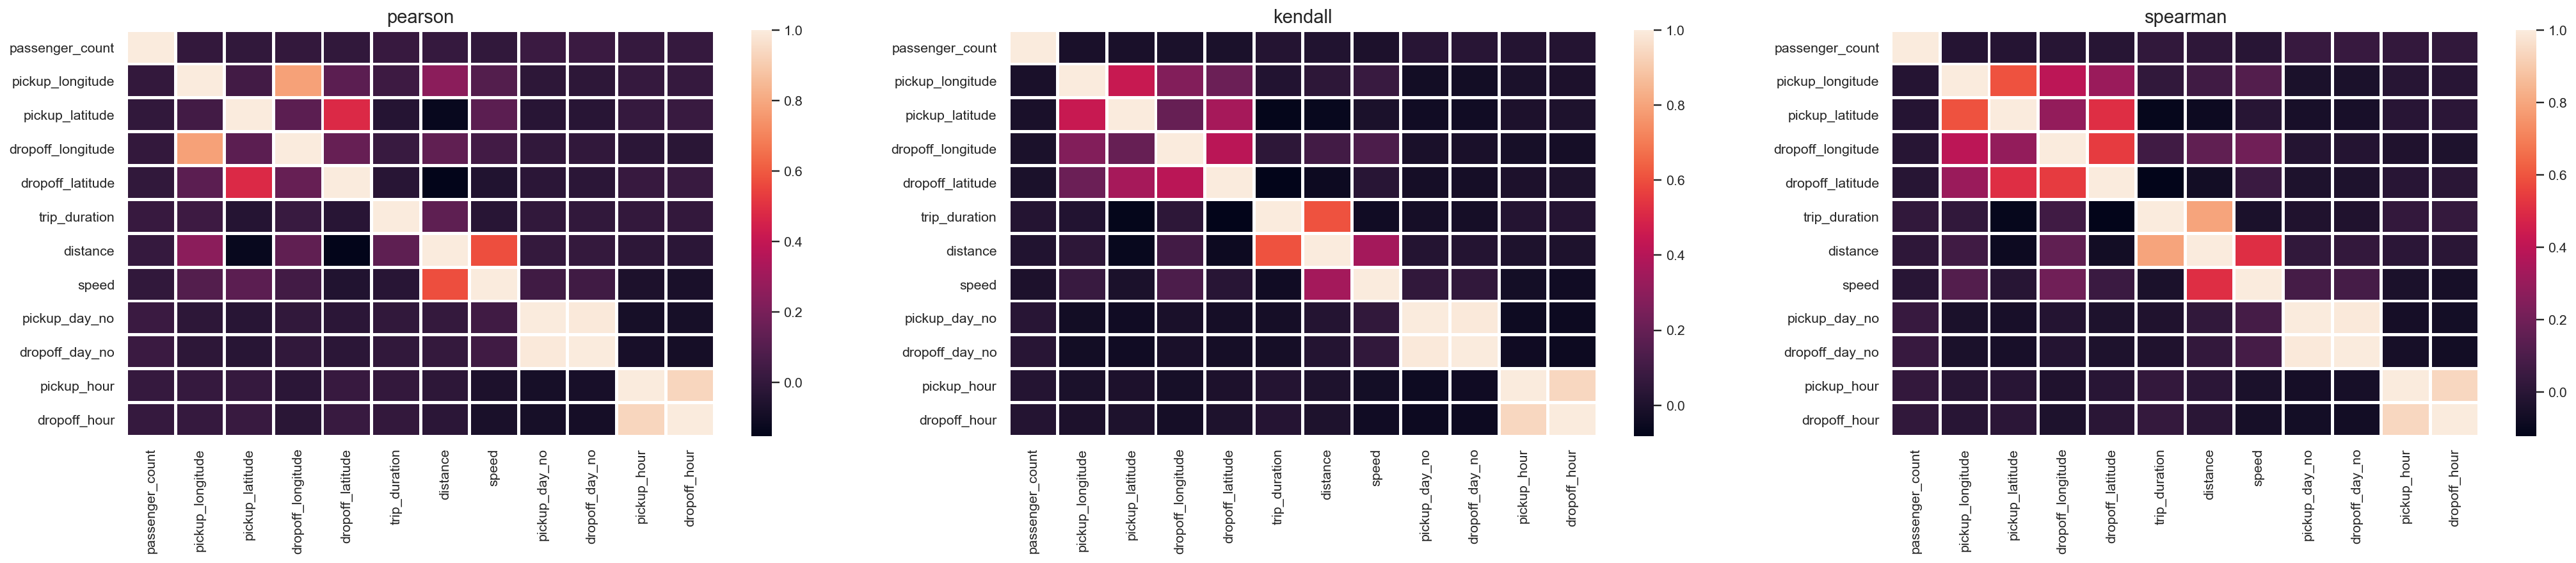

In [56]:
# plotting heatmap 

plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=15)


**Summary**

* Distance and trip Duration have correlation and also causally connected
* Distance have correlation with Speed

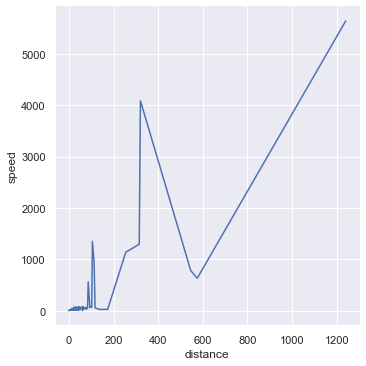

In [57]:
# Lineplot of Distance with speed
sns.relplot(data=data, x="distance", y="speed", kind="line")

### BVA- Continuous-Categorical variables

In [58]:
# isolating categorical datatypes
cat = data.select_dtypes(include="category")
cat.dtypes

vendor_id             category
store_and_fwd_flag    category
pickup_day            category
dropoff_day           category
pickup_month          category
dropoff_month         category
pickup_timezone       category
dropoff_timezone      category
dtype: object

In [59]:
numerical.dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
distance             float64
speed                float64
pickup_day_no          int64
dropoff_day_no         int64
pickup_hour            int64
dropoff_hour           int64
dtype: object

List of Hypothesis and investigation to perform under this combination.

* Does Trip Duration changes with vendor_id
* Does Trip Duration changes with Day of week
* Does Trip Duration changes with Month of year
* Does Trip Duration changes with Timezone - Morning, Noon, Evening, Night
* Does Trip Duration have any relationship with store_and_fwd_flag


* Does distance have any relationship with vendor_id
* Does distance changes with Day of week
* Does distance changes with Month of year
* Does distance changes with Timezone - Morning, Noon, Evening, Night
* Does distance have any relationship with store_and_fwd_flag


* Does speed have any relationship with vendor_id
* Does speed changes with Day of week
* Does speed changes with Month of year
* Does speed changes with Timezone - Morning, Noon, Evening, Night
* Does speed have any relationship with store_and_fwd_flag



In [60]:
#BVA plotting of Numerical and categorical variables

def distribution(data, numvar):
    """ Draws a chart showing numerical catplot combo of different Category variables """
    # Catplot
    
    sns.catplot(x=numvar, y="vendor_id", kind="bar",  data=data)
    sns.catplot(x=numvar, y="store_and_fwd_flag", kind="bar", data=data)
    sns.catplot(x=numvar, y="pickup_day", kind="bar", data=data)
    sns.catplot(x=numvar, y="pickup_month", kind="bar", data=data)
    sns.catplot(x=numvar, y="pickup_timezone", kind="bar", data=data)

**Relationship between Trip Duration and Categorical variables**

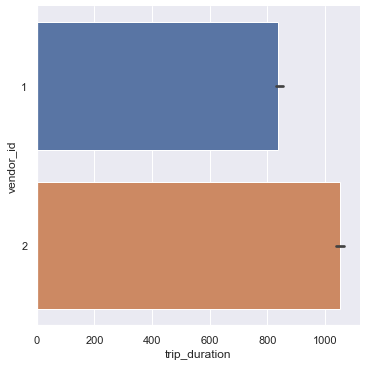

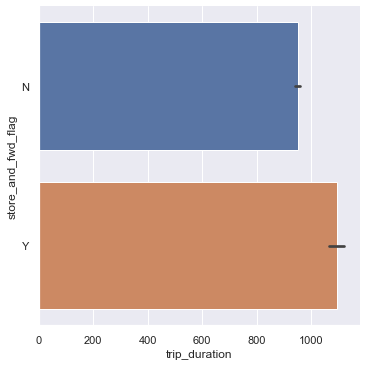

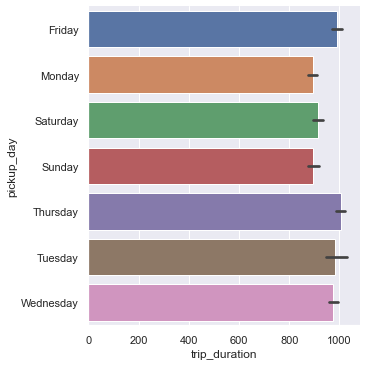

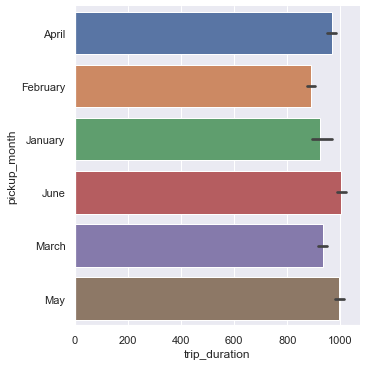

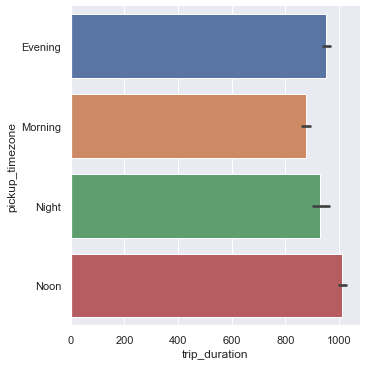

In [61]:
distribution(data, data["trip_duration"])

**Inference on Trip Duration**

1. Short trip duration usually happens for vendor 1 in comparison to vendor 2
2. store_and_fwd_flag is stored mainly for short duration trips
3. Trip Duration is more on Thursday and Friday, Monday and Sunday takes the least time
4. Trip Duration is more on May, June months and least on February and January
5. Trip Duration is more on Noon and Evening and least on morning



**Relationship between Distance and Categorical variables**

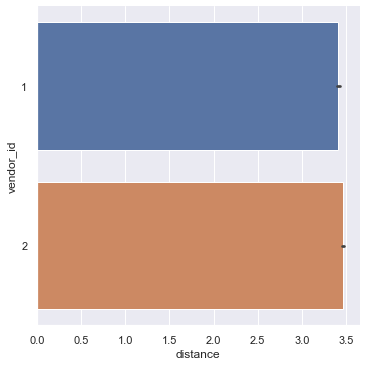

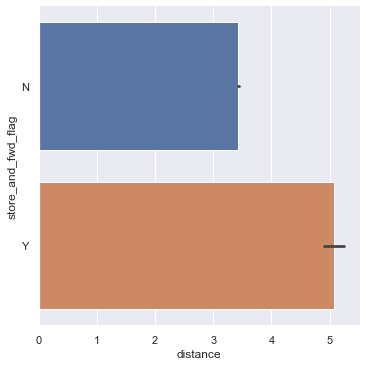

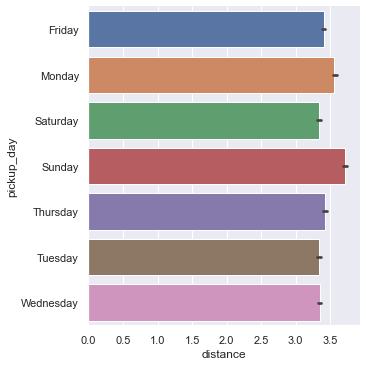

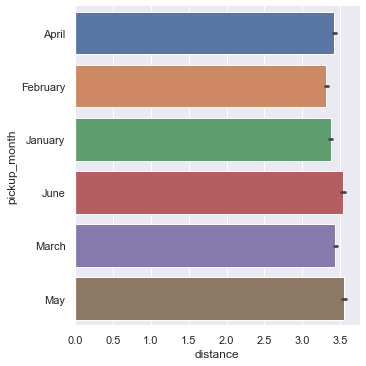

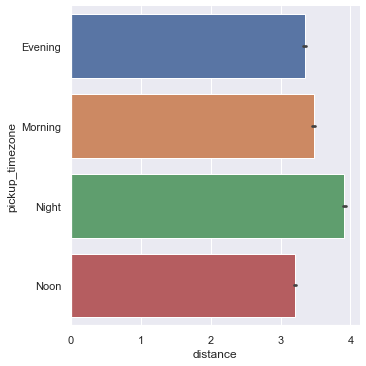

In [62]:
distribution(data, data["distance"])

**Inference on Distance**

1. Distance remains almost same for vendor 1 and 2
2. store_and_fwd_flag is stored mainly for short distance trips
3. Distance is more on Sunday and Monday and takes the least on Tuesday, Saturday, Wednesday
4. Distance is more on May, June months and least on February and January
5. Distance is more on Noon and Evening and least on Night



**Relationship between Speed and Categorical variables**

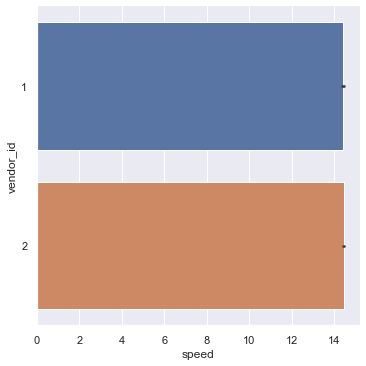

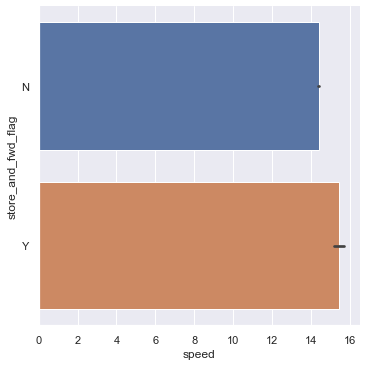

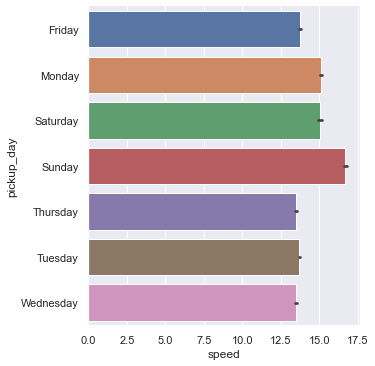

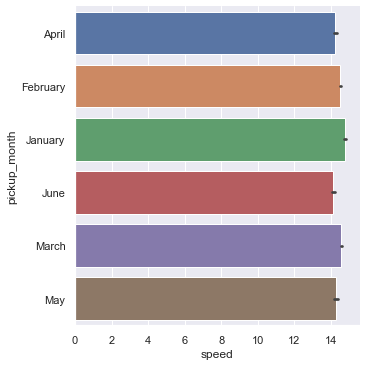

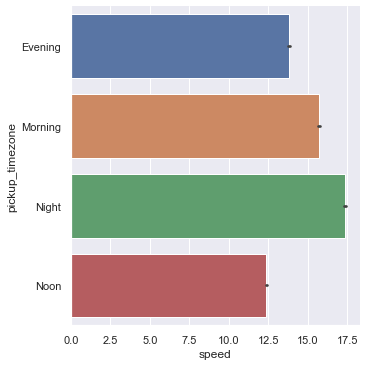

In [63]:
distribution(data, data["speed"])

**Inference on Speed**

1. Speed remains same for vendor 1 and 2
2. store_and_fwd_flag is stored mainly for short Speed trips
3. Speed is more on Sunday and takes the least on Thursday and Friday
4. Speed is almost same for all months
5. Speed is more at Night and least on Noon


### Multivariate Analysis

 **Distribution of Weather, Speed & duration**

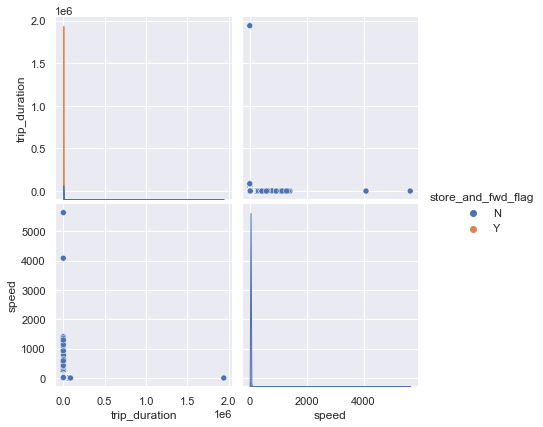

In [64]:
sns.pairplot(data[['trip_duration','speed','store_and_fwd_flag']], hue='store_and_fwd_flag', height=3)

**Inference on Relationship with Weather, Speed & duration**
* No visible relationship could be inferred

## Summary – BVA

1. Distance and trip Duration have correlation and also causally connected
2. Distance have correlation with Speed
3. Speed & Distance remains almost same for vendor 1 and 2, Short trip duration usually happens for vendor 1
4. Store_and_fwd_flag is stored mainly for short distance, short duration, and short speed trips
5. Inference of Distance, Speed and Duration on Weekdays
**Sunday:**
*	Distance (top)  
*	Speed (top)
*	Duration (low)

**Monday:**

*	Distance (high)
*	Duration (low)

**Tuesday:**
*	Distance (least)

**Wednesday:**
*	Distance (low)

**Thursday:**
*	Speed (least) 
*	Duration (top)

**Friday:**
*	Speed (low)
*	Duration (high)

**Saturday:**
*	Distance (low)

6. Inference of Distance, Speed and Duration on Months
* Jan: Duration (low), Distance (low)
* Feb: Duration (least), Distance (least)
* May: Duration (top), Distance (top)
* June: Duration (high), Distance (high)

7. Inference of Distance, Speed and Duration on Time Zone
* Morning: Duration (least), Speed (least)
* Noon: Duration (Top), Distance (Top), 
* Evening: Duration (high), Distance (high), 
* Night: Distance (least), Speed (more)


# Conclusion on EDA 

## Summary – EDA

**Summary of Target variable:**
*	The maximum value (Extreme outlier) is 1.9 million seconds ie 22.45064815 days.
*	Trip duration of 22.45064815 exists only once and we can safely remove this row as it’s an error.
*	The minimum value is 1 second which is most probably error

**Summary of Passenger count:**
*	There are 33 zero passengers which might be error
*	Most passengers lies between 1 & 2
*	Passengers above 6 is rare
*	Passenger count Maximum 9 needs more exploration

**Summary of day of week:**
    
*	Most passengers is on Friday and Saturday
*	Monday has least passengers followed by Sunday

***Inference of Distance, Speed and Duration on Weekdays***
**Sunday:**
*	Distance (top)  
*	Speed (top)
*	Duration (low)

**Monday:**

*	Distance (high)
*	Duration (low)

**Tuesday:**
*	Distance (least)

**Wednesday:**
*	Distance (low)

**Thursday:**
*	Speed (least) 
*	Duration (top)

**Friday:**
*	Speed (low)
*	Duration (high)

**Saturday:**
*	Distance (low)




**Summary of distance:**
*	Distance 1240.910000 likely to be an error, have to be removed.
*	3927 trips with zero distance, which is an error
*   Distance remains almost same for vendor 1 and 2
*   store_and_fwd_flag is stored mainly for short distance trips
*   Distance is more on Sunday and Monday and takes the least on Tuesday, Saturday, Wednesday
*   Distance is more on May, June months and least on February and January
*   Distance is more on Noon and Evening and least on Night


**Summary of Speed:**
*	Speed 5640.500000 likely to be an error
*	There are 3927 Zero speed entries
*	Speed remains same for vendor 1 and 2
*	store_and_fwd_flag is stored mainly for short Speed trips
*	Speed is more on Sunday and takes the least on Thursday and Friday
*	Speed is almost same for all months
*	Speed is more at Night and least on Noon


**Summary of Vendor:**
*	vendor 2 has more trips
*	Speed & Distance remains almost same for vendor 1 and 2
*	Short trip duration usually happens for vendor 1

**Summary of Climate:**
*	Climate variable, store_and_fwd_flag is mostly non operational
*	Store_and_fwd_flag is stored mainly for short distance, short duration, and short speed trips

**Summary of Time Zone & Month:**

*	Evening & Noon Timezone has more trips, Morning the least
*	There is not much difference in the number of trips across months.

***Inference of Distance, Speed and Duration on Months***
* Jan: Duration (low), Distance (low)
* Feb: Duration (least), Distance (least)
* May: Duration (top), Distance (top)
* June: Duration (high), Distance (high)

***Inference of Distance, Speed and Duration on Time Zone***
* Morning: Duration (least), Speed (least)
* Noon: Duration (Top), Distance (Top), 
* Evening: Duration (high), Distance (high), 
* Night: Distance (least), Speed (more)



1. ***Distance and trip Duration have correlation and also causally connected***
2. ***Distance have correlation with Speed***







